# Wine Dataset Analysis - Unsupervised Learning Study

## Project Overview

**Objective:** To explore patterns and relationships in wine chemical composition data using unsupervised learning techniques, with the goal of understanding natural groupings and identifying key distinguishing chemical features.

## Dataset Information

- **Source:** Wine Data Set from UCI ML Repository (https://archive.ics.uci.edu/ml/datasets/wine)
- **Samples:** 178 wine samples from 3 different cultivars grown in the same region of Italy  
- **Features:** 13 chemical constituent measurements per sample
- **Type:** Multivariate dataset suitable for classification and clustering analysis

In [51]:
# Import basic libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Load the wine dataset
wine_data = pd.read_csv('wine-clustering.csv')

## **Exploratory Data Analysis (EDA)**

In [53]:
# Display a random sample of 10 rows from the dataset
wine_data.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695
82,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630
39,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985
91,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450
160,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
37,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
12,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [54]:
wine_data.shape

(178, 13)

In [55]:
wine_data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [56]:
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [57]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Outliers**

In [58]:
# Import the necessary libraries from plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Get the list of columns
features = wine_data.columns

# Create a figure with subplots
# We define a 4x4 grid and pass the column names as titles for each subplot
fig = make_subplots(rows=4, cols=4, subplot_titles=features)

# Loop through each feature and add a boxplot to the corresponding subplot
for i, feature in enumerate(features):
    # Calculate the row and column position for the current subplot
    row = (i // 4) + 1
    col = (i % 4) + 1
    
    # Add the boxplot trace to the figure at the calculated position
    fig.add_trace(
        go.Box(y=wine_data[feature], name=feature),
        row=row,
        col=col
    )

# Update the layout for a better look
fig.update_layout(
    height=1500, 
    width=1300, 
    title_text="Distribution of Wine Features (Hover for Values)",
    showlegend=False  # We don't need a legend since each plot has a title
)

# Show the interactive figure
fig.show()

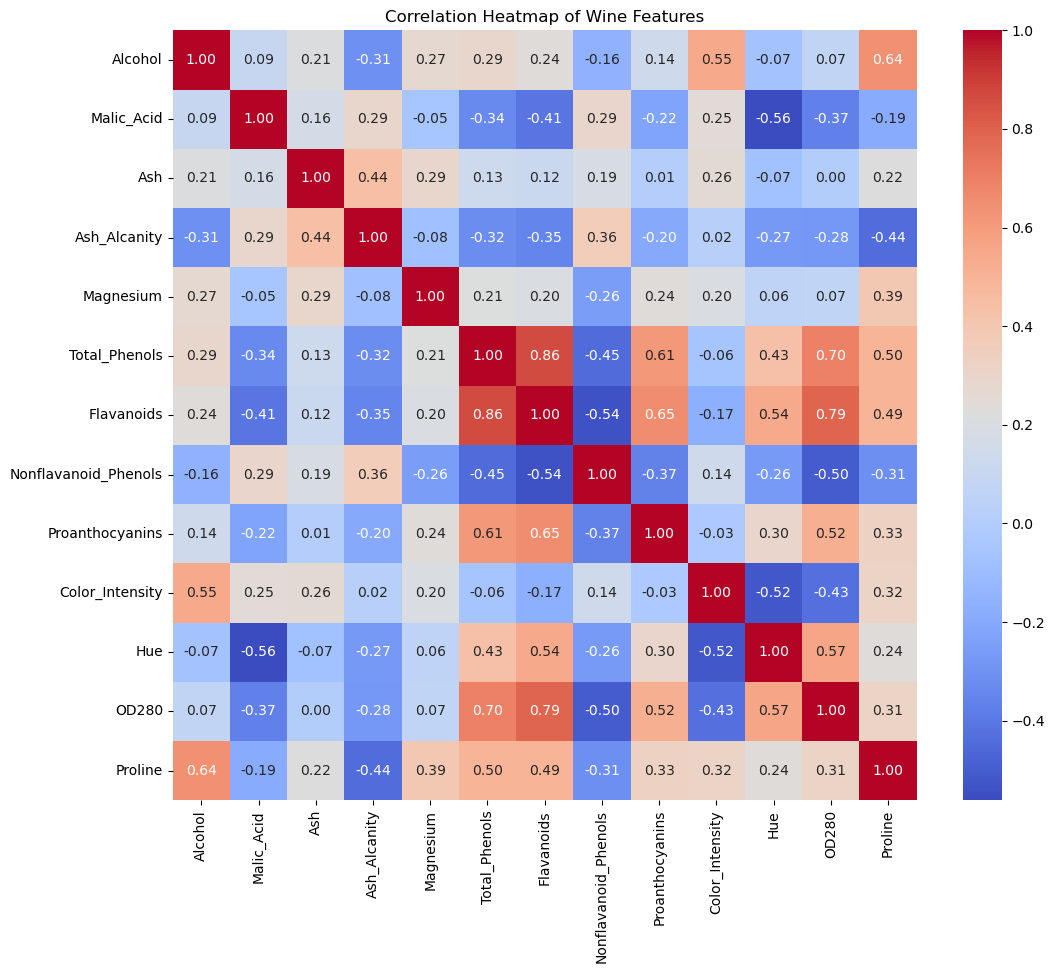

In [59]:
plt.figure(figsize=(12, 10))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Wine Features')
plt.show()

## **Data Preprocessing: Feature Scaling**

In [60]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the data
wine_data_scaled = scaler.fit_transform(wine_data)

In [61]:
wine_data_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## **Dimensionality Reduction (PCA)**

In [62]:
from sklearn.decomposition import PCA

# Create a PCA object to reduce to 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled data
wine_pca = pca.fit_transform(wine_data_scaled)
wine_pca

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

In [63]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [64]:
pca.explained_variance_ratio_.sum()

np.float64(0.5540633835693528)

## **Modeling: K-Means Clustering with PCA**

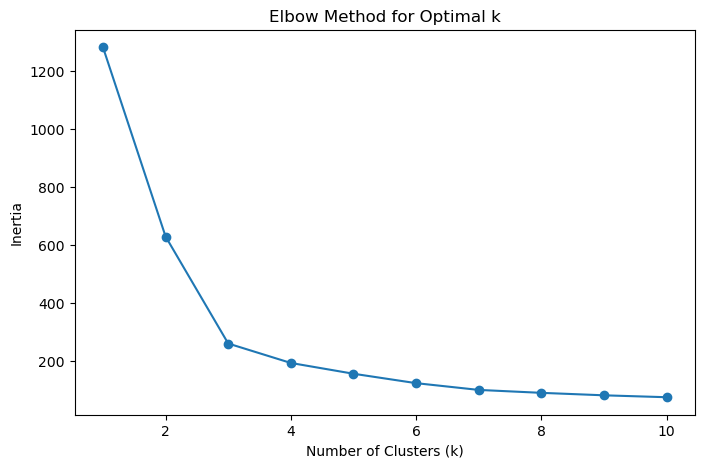

In [65]:
from sklearn.cluster import KMeans

# Find the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(wine_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

**Aplly K-Means Clustering**

In [66]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels_pca = kmeans.fit_predict(wine_pca)

In [67]:
cluster_labels_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [68]:
kmeans2 = kmeans.fit(wine_pca)

In [69]:
# Center the clusters
centers = kmeans.cluster_centers_
centers

array([[ 2.26614991,  0.86559213],
       [-2.74392982,  1.2141906 ],
       [-0.16278513, -1.76758824]])

In [70]:
import plotly.express as px
import plotly.graph_objects as go

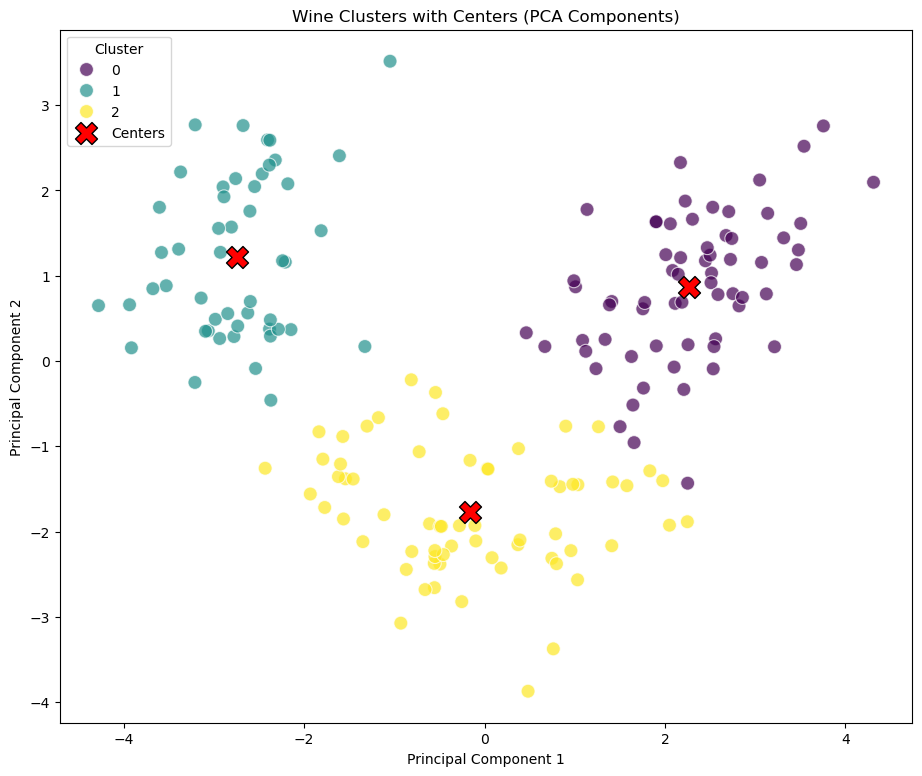

In [71]:
# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=wine_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels_pca

# Get the centers from the PCA-based model
centers_pca = kmeans2.cluster_centers_

# Plot the clusters
plt.figure(figsize=(11, 9))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)

# Plot the cluster centers on top
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=250, marker='X', label='Centers', edgecolor='black', )

plt.title('Wine Clusters with Centers (PCA Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [72]:
# Create a copy of the original dataframe to avoid modifying it
wine_data_clustered = wine_data.copy()

# Add the cluster labels as a new column
wine_data_clustered['Cluster'] = cluster_labels_pca

# Display 10 random rows to see the new column
wine_data_clustered.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450,2
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,1
124,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380,2
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845,0
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,0
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,2
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,1
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,0
156,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480,1
49,13.94,1.73,2.27,17.4,108,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260,0


In [73]:
# Show how many samples are in each cluster
wine_data_clustered['Cluster'].value_counts().sort_index()

Cluster
0    64
1    49
2    65
Name: count, dtype: int64

In [74]:
# Calculate the mean of each feature for each cluster
cluster_summary = wine_data_clustered.groupby('Cluster').mean()
print(cluster_summary)

           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster                                                              
0        13.659219    1.975781  2.463750     17.596875  107.312500   
1        13.151633    3.344490  2.434694     21.438776   99.020408   
2        12.238308    1.931385  2.219385     19.898462   92.830769   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster                                                                     
0             2.859688    3.012656              0.290000         1.921719   
1             1.678163    0.797959              0.450816         1.163061   
2             2.204308    1.989231              0.365538         1.587692   

         Color_Intensity       Hue     OD280      Proline  
Cluster                                                    
0               5.406250  1.069688  3.157188  1082.562500  
1               7.343265  0.685918  1.690204   627.551020  
2               2.99261

## **K-Means Clustering with all Features**

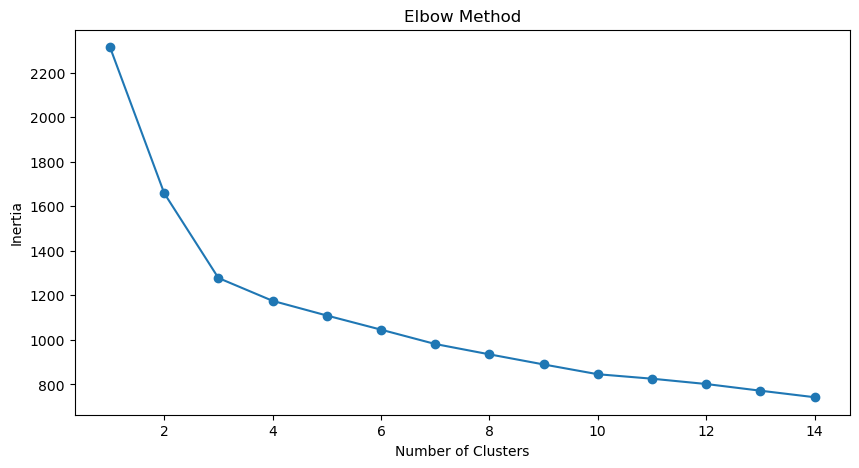

In [75]:
# Elbow Method
inertia = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=300, n_init=10)
    kmeans.fit(wine_data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



In [76]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, max_iter=300)
kmeans.fit(wine_data_scaled)




KMeans(n_clusters=3, random_state=42)

In [87]:
# Show the cluster centers for the KMeans model trained on all features
kmeans.cluster_centers_

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [84]:
cluster_labels_all = kmeans.labels_
cluster_labels_all

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [79]:
# Create a new DataFrame by copying the original
wine_data_clustered_all = wine_data.copy()

# Add the cluster labels from the K-Means model trained on all features
wine_data_clustered_all['Cluster'] = kmeans.labels_

# Display a random sample of 10 rows from the new DataFrame to verify
wine_data_clustered_all.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,2
55,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120,2
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695,1
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
82,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630,0
86,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480,0


In [80]:
# Calculate the mean of each feature for each cluster
cluster_summary = wine_data_clustered_all.groupby('Cluster').mean()
print(cluster_summary)

           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster                                                              
0        12.250923    1.897385  2.231231     20.063077   92.738462   
1        13.134118    3.307255  2.417647     21.241176   98.666667   
2        13.676774    1.997903  2.466290     17.462903  107.967742   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         Color_Intensity       Hue     OD280      Proline  
Cluster                                                    
0               2.973077  1.062708  2.803385   510.169231  
1               7.234706  0.691961  1.696667   619.058824  
2               5.45354

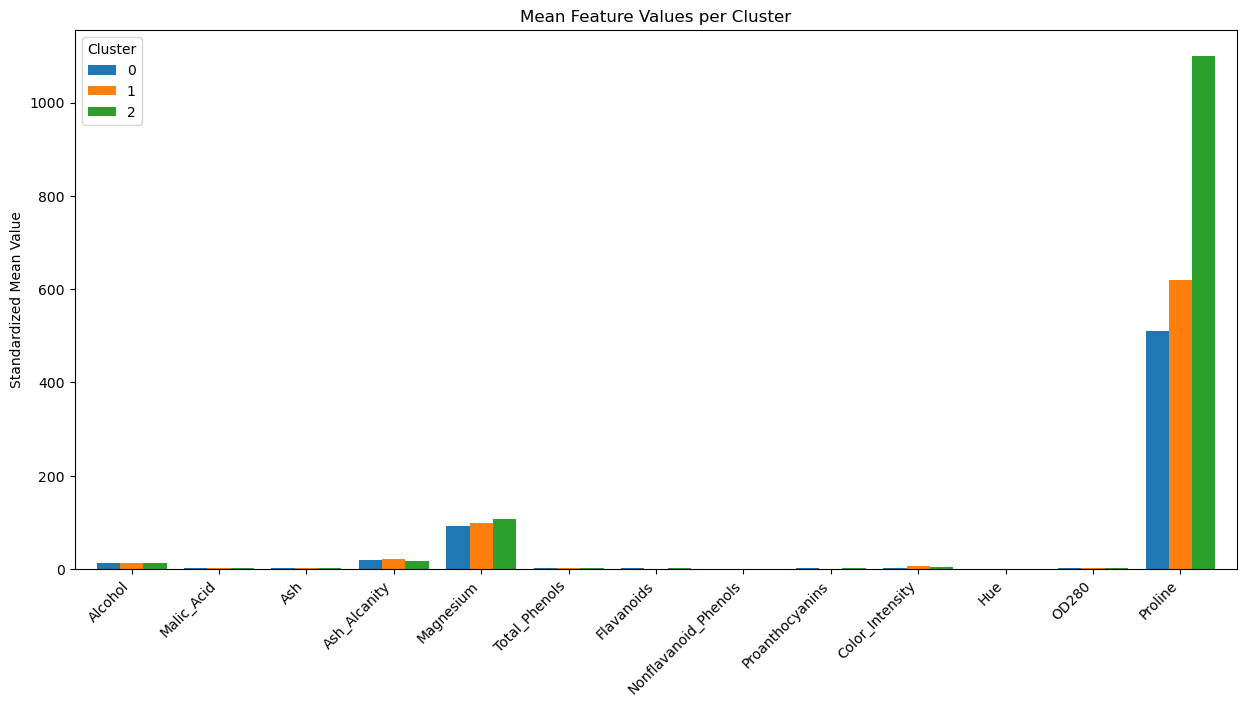

In [ ]:
# Plot the mean feature values for each cluster as a bar chart
cluster_summary.T.plot(kind='bar', figsize=(15, 7), width=0.8)
plt.title('Mean Feature Values per Cluster')  
plt.ylabel('Standardized Mean Value')         
plt.xticks(rotation=45, ha='right')           
plt.show()                                    

## Model Validation: Comparing PCA-based vs Full-feature Clustering Results

In [ ]:
# Import the function to compute the Adjusted Rand Index (ARI)
from sklearn.metrics import adjusted_rand_score

# Calculate the ARI between the cluster labels from PCA-based KMeans and all-features KMeans
ari_score = adjusted_rand_score(cluster_labels_pca, cluster_labels_all)

# Print the ARI score to compare the similarity between the two clustering results
print(f'Adjusted Rand Score between the two models: {ari_score:.3f}')

Adjusted Rand Score between the two models: 0.932


### Model Comparison Results
ARI = 0.932 indicates strong agreement between clustering methods. PCA successfully preserved the clustering structure.